## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_count = merge_df["Mouse ID"].count()
print(mouse_count)
print(len(merge_df["Mouse ID"].unique()))

1893
249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_data = merge_df.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)

merge_with_dup_df = merge_df
merge_with_dup_df["Is duplicate?"] = duplicated_data
merge_with_dup_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_with_dup_df.loc[merge_with_dup_df["Is duplicate?"] == True]

#Searching by Mouse ID specifically to ensure no other data points
merge_with_dup_df.loc[merge_with_dup_df["Mouse ID"] == "g989"]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?
908,g989,Propriva,Female,21,26,0,45.000000,0,True
909,g989,Propriva,Female,21,26,0,45.000000,0,True
910,g989,Propriva,Female,21,26,5,48.786801,0,True
911,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,51.745156,0,True
913,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,51.325852,1,True
915,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,55.326122,1,True
917,g989,Propriva,Female,21,26,20,54.657650,1,True


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merge_df[merge_df["Mouse ID"] != "g989"]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [12]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_count = clean_df["Mouse ID"].count()
print(cleaned_mouse_count)
print(len(clean_df["Mouse ID"].unique()))

1880
248


## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
regimen_group_df = clean_df.groupby("Drug Regimen") 
regimen_summary_df = pd.DataFrame()
regimen_summary_df["Mean"] = regimen_group_df["Tumor Volume (mm3)"].mean()
regimen_summary_df["median"] = regimen_group_df["Tumor Volume (mm3)"].median()
regimen_summary_df["Variance"] = regimen_group_df["Tumor Volume (mm3)"].var()
regimen_summary_df["Std"] = regimen_group_df["Tumor Volume (mm3)"].std()
regimen_summary_df["SEM"] = regimen_group_df["Tumor Volume (mm3)"].sem()
regimen_summary_df

,Mean,median,Variance,Std,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

agg_sum = regimen_group_df["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
agg_sum

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

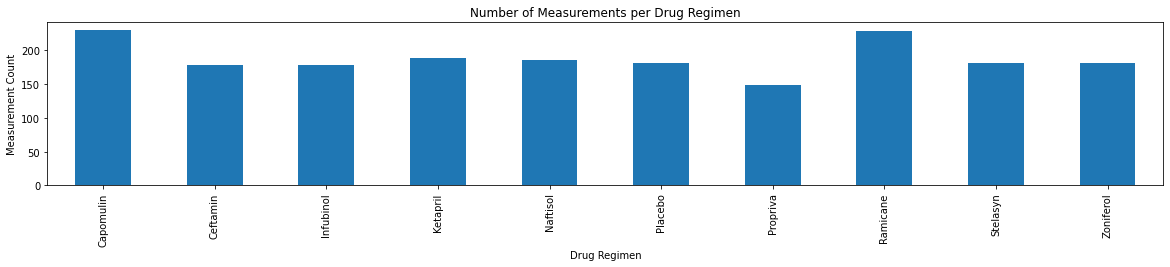

<Figure size 432x288 with 0 Axes>

In [15]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
regimen_count = regimen_group_df["Drug Regimen"].count()
regimen_count.plot(kind="bar", figsize=(20,3))
plt.title("Number of Measurements per Drug Regimen")
plt.ylabel("Measurement Count")
plt.show()
plt.tight_layout()

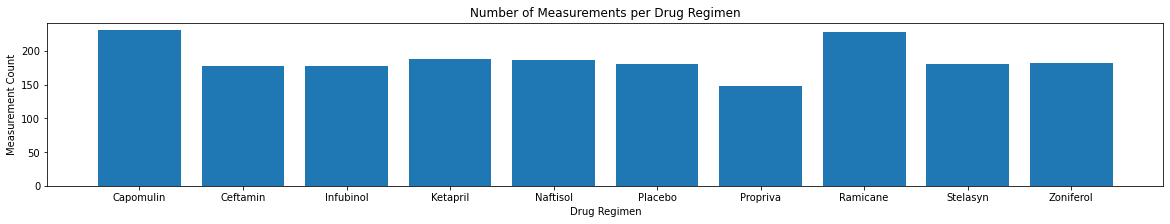

<Figure size 432x288 with 0 Axes>

In [16]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drugs = ["Capomulin","Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn",
         "Zoniferol"]
drug_count = regimen_count

plt.figure(figsize=(20, 3))
plt.bar(drugs, drug_count, align="center")
plt.title("Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurement Count")
plt.show()
plt.tight_layout()

Text(0.5, 1.0, 'Distribution of Male vs Female Mice Across All Trials')

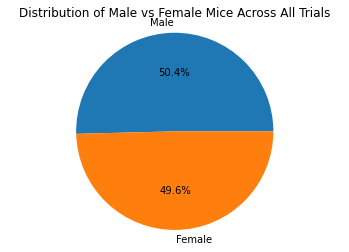

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
df_of_gender = clean_df[["Mouse ID", "Sex"]]
count_of_gender = df_of_gender.drop_duplicates(subset="Mouse ID")
gender_count = count_of_gender["Sex"].value_counts()
gender_count.plot(kind="pie", autopct="%1.1f%%")
plt.axis("equal")
plt.ylabel("")
plt.title("Distribution of Male vs Female Mice Across All Trials")


<ipython-input-21-3cb5dea20738>:6: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  plt.pie(gender_number, explode=explode, labels=gender,


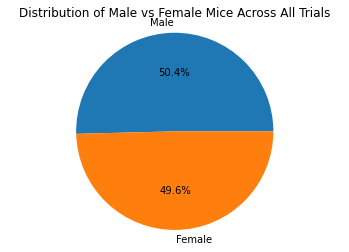

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = ["Male", "Female"]
gender_number = [gender_count]
explode = (0,0)

plt.pie(gender_number, explode=explode, labels=gender,
        autopct="%1.1f%%")
plt.axis("equal")
plt.title("Distribution of Male vs Female Mice Across All Trials")
plt.show()

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [22]:
##Printing out largest(last) timepoint by mouse
mouse_grouped = clean_df.groupby("Mouse ID")
last_timepoint = mouse_grouped["Timepoint"].max()
last_timepoint_df = pd.DataFrame(last_timepoint)
#last_timepoint_df

In [23]:
##Merging the last timepoint column into the original data 
timepoint_merge = pd.merge(clean_df, last_timepoint_df, on="Mouse ID", how="outer")
timepoint_merge = timepoint_merge.rename(columns={"Timepoint_x" : "Timepoint", "Timepoint_y" : "Last Timepoint"})
#timepoint_merge


In [24]:
##combining the data with the desired drugs into once dataframe 
regimen_trim = timepoint_merge[timepoint_merge["Drug Regimen"] == "Capomulin"]
regimen_trim2 = timepoint_merge[timepoint_merge["Drug Regimen"] == "Ramicane"]
regimen_trim3 = timepoint_merge[timepoint_merge["Drug Regimen"] == "Infubinol"]
regimen_trim4 = timepoint_merge[timepoint_merge["Drug Regimen"] == "Ceftamin"]

regimen_trim = regimen_trim2.append(regimen_trim)
regimen_trim = regimen_trim3.append(regimen_trim)
regimen_trim = regimen_trim4.append(regimen_trim)

In [25]:
##Dropping "duplicate" i.e. earlier timepoints by mouse and keeping the last (should be the largest)
drop_timepoint = regimen_trim.drop_duplicates("Mouse ID", keep="last")
#drop_timepoint
##The tumor value should be the final tumor value 

In [26]:
final_tumor_vol = pd.DataFrame()
final_tumor_vol = drop_timepoint[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
#A data frame containing the Tumor Volume at the final time point
final_tumor_vol

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
493,a275,Ceftamin,62.999356
594,b447,Ceftamin,45.000000
600,b487,Ceftamin,56.057749
617,b759,Ceftamin,55.742829
840,f436,Ceftamin,48.722078
...,...,...,...
370,s710,Capomulin,40.728578
380,l509,Capomulin,41.483008
390,r944,Capomulin,41.581521
440,i557,Capomulin,47.685963


In [27]:
#Creating four dataframes, one for each drug, which just its Mouse ID, Regimen, and final tumor volume
capo_final_vol = drop_timepoint[drop_timepoint["Drug Regimen"] == "Capomulin"]
rami_final_vol = drop_timepoint[drop_timepoint["Drug Regimen"] == "Ramicane"]
infu_final_vol = drop_timepoint[drop_timepoint["Drug Regimen"] == "Infubinol"]
ceft_final_vol = drop_timepoint[drop_timepoint["Drug Regimen"] == "Ceftamin"]

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
##Capomulin box plot
# fig1, ax1 = plt.subplots()
# ax1.set_title("Tumor Volume after Capomulin Treatment")
# ax1.set_ylabel("Tumor Volume (mm3)")
# ax1.boxplot(capo_final_vol["Tumor Volume (mm3)"])
# plt.show()

In [28]:
##Capomulin IQR and outliers
quartiles = capo_final_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumor volume is: {lowerq}")
print(f"The upper quartile of Capomulin tumor volume is: {upperq}")
print(f"The interquartile range of Capomulin tumor volume is: {iqr}")
print(f"The the median of Capomulin tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

capomulin_outliers = capo_final_vol.loc[(capo_final_vol["Tumor Volume (mm3)"] < lower_bound) | (capo_final_vol["Tumor Volume (mm3)"] > upper_bound)]
capomulin_outliers

The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The interquartile range of Capomulin tumor volume is: 7.781863460000004
The the median of Capomulin tumor volume is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?,Last Timepoint


In [ ]:
# ##Ramicane box plot
# fig1, ax1 = plt.subplots()
# ax1.set_title("Tumor Volume after Ramicane Treatment")
# ax1.set_ylabel("Tumor Volume (mm3)")
# ax1.boxplot(rami_final_vol["Tumor Volume (mm3)"])
# plt.show()

In [29]:
##Ramicane IQR and outliers
quartiles = rami_final_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane tumor volume is: {lowerq}")
print(f"The upper quartile of Ramicane tumor volume is: {upperq}")
print(f"The interquartile range of Ramicane tumor volume is: {iqr}")
print(f"The the median of Ramicane tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

ramicane_outliers = rami_final_vol.loc[(rami_final_vol["Tumor Volume (mm3)"] < lower_bound) | (rami_final_vol["Tumor Volume (mm3)"] > upper_bound)]
ramicane_outliers

The lower quartile of Ramicane tumor volume is: 31.56046955
The upper quartile of Ramicane tumor volume is: 40.65900627
The interquartile range of Ramicane tumor volume is: 9.098536719999998
The the median of Ramicane tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?,Last Timepoint


In [30]:
# ##Infubinol box plot
# fig1, ax1 = plt.subplots()
# ax1.set_title("Tumor Volume after Infubinol Treatment")
# ax1.set_ylabel("Tumor Volume (mm3)")
# ax1.boxplot(infu_final_vol["Tumor Volume (mm3)"])
# plt.show()

In [31]:
##Infubinol IQR and outliers
quartiles = infu_final_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol tumor volume is: {lowerq}")
print(f"The upper quartile of Infubinol tumor volume is: {upperq}")
print(f"The interquartile range of Infubinol tumor volume is: {iqr}")
print(f"The the median of Infubinol tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

infubinol_outliers = infu_final_vol.loc[(infu_final_vol["Tumor Volume (mm3)"] < lower_bound) | (infu_final_vol["Tumor Volume (mm3)"] > upper_bound)]
infubinol_outliers

The lower quartile of Infubinol tumor volume is: 54.04860769
The upper quartile of Infubinol tumor volume is: 65.52574285
The interquartile range of Infubinol tumor volume is: 11.477135160000003
The the median of Infubinol tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?,Last Timepoint
669,c326,Infubinol,Female,18,25,5,36.321346,0,False,5


In [32]:
# ##Ceftamin box plot
# fig1, ax1 = plt.subplots()
# ax1.set_title("Tumor Volume after Ceftamin Treatment")
# ax1.set_ylabel("Tumor Volume (mm3)")
# ax1.boxplot(ceft_final_vol["Tumor Volume (mm3)"])
# plt.show()

In [33]:
##Ceftamin IQR and outliers
quartiles = ceft_final_vol["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin tumor volume is: {lowerq}")
print(f"The upper quartile of Ceftamin tumor volume is: {upperq}")
print(f"The interquartile range of Ceftamin tumor volume is: {iqr}")
print(f"The the median of Ceftamin tumor volume is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

ceftamin_outliers = ceft_final_vol.loc[(ceft_final_vol["Tumor Volume (mm3)"] < lower_bound) | (ceft_final_vol["Tumor Volume (mm3)"] > upper_bound)]
ceftamin_outliers

The lower quartile of Ceftamin tumor volume is: 48.72207785
The upper quartile of Ceftamin tumor volume is: 64.29983003
The interquartile range of Ceftamin tumor volume is: 15.577752179999997
The the median of Ceftamin tumor volume is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Is duplicate?,Last Timepoint


In [34]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


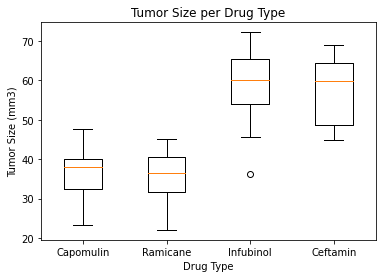

In [35]:
drug_plots = [capo_final_vol["Tumor Volume (mm3)"], rami_final_vol["Tumor Volume (mm3)"], infu_final_vol["Tumor Volume (mm3)"], ceft_final_vol["Tumor Volume (mm3)"]]
fig7, ax7 = plt.subplots()
ax7.set_title("Tumor Size per Drug Type")
plt.boxplot(drug_plots)
drug_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.xlabel("Drug Type")
plt.ylabel("Tumor Size (mm3)")

plt.show()

##Need to change outlier point color

## Line and Scatter Plots

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin_total_tumor = regimen_trim[regimen_trim["Drug Regimen"] == "Capomulin"]
#capomulin_total_tumor


In [37]:
mouse_s185 = regimen_trim[regimen_trim["Mouse ID"] == "s185"]
#mouse_s185

Text(0, 0.5, 'Tumor Volume (mm3)')

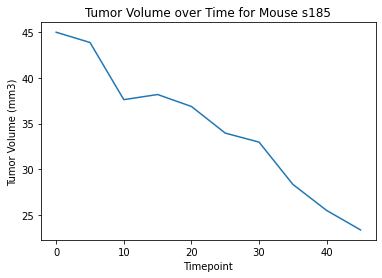

In [38]:
plt.plot(mouse_s185["Timepoint"], mouse_s185["Tumor Volume (mm3)"])
plt.title("Tumor Volume over Time for Mouse s185")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")

In [39]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capo_mouse = capomulin_total_tumor.groupby("Mouse ID")
avg_capo_tum_vol = capo_mouse["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_total_tumor.drop_duplicates(subset=["Mouse ID"])
mouse_weight = pd.merge(mouse_weight, avg_capo_tum_vol, on="Mouse ID", how="outer")
mouse_weight = mouse_weight[["Mouse ID", "Drug Regimen", "Weight (g)", "Tumor Volume (mm3)_y"]]
mouse_weight = mouse_weight.rename(columns={"Tumor Volume (mm3)_y": "Average Tumor Volume (mm3)"})
#mouse_weight


In [40]:
mouse_weight.columns

Index(['Mouse ID', 'Drug Regimen', 'Weight (g)', 'Average Tumor Volume (mm3)'], dtype='object')

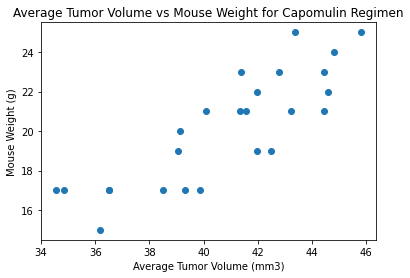

In [41]:
plt.scatter(mouse_weight["Average Tumor Volume (mm3)"], mouse_weight["Weight (g)"])
plt.title("Average Tumor Volume vs Mouse Weight for Capomulin Regimen")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.show()

## Correlation and Regression

In [42]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight["Average Tumor Volume (mm3)"], mouse_weight["Weight (g)"])
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume is 0.84


The r-squared is: 0.7088568047708721


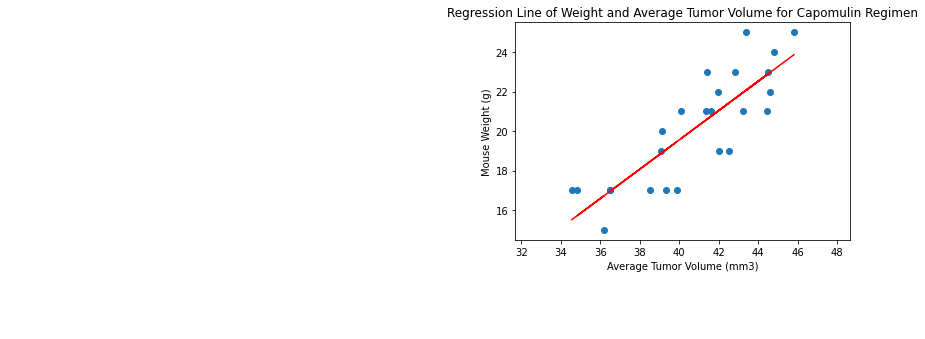

In [51]:
x_values = mouse_weight["Average Tumor Volume (mm3)"]
y_values = mouse_weight["Weight (g)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (6,10),fontsize=15,color="red")
plt.xlabel("Average Tumor Volume (mm3)")
plt.ylabel("Mouse Weight (g)")
plt.title("Regression Line of Weight and Average Tumor Volume for Capomulin Regimen")
print(f"The r-squared is: {rvalue**2}")
plt.axis("equal")

plt.show()

##Fix formatting and need to print equation on line